In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Exploratory analysis is done when you are searching for insights. These visualizations don't need to be perfect. 
# You are using plots to find insights, but they don't need to be aesthetically appealing. 
# You are the consumer of these plots, and you need to be able to find the answer to your questions from these plots.

In [3]:
# Explanatory analysis is done when you are providing your results for others. 
# These visualizations need to provide you the emphasis necessary to convey your message. They should be accurate, insightful, and visually appealing.

In [4]:
# The five steps of the data analysis process:

# 1. Extract - Obtain the data from a spreadsheet, SQL, the web, etc.
# 2. Clean - Here, we could use exploratory visuals.
# 3. Explore - Here, we use exploratory visuals.
# 4. Analyze - Here, we might use either exploratory or explanatory visuals.
# 5. Share - Here is where explanatory visuals live.

In [5]:
# The Four Levels of Measurement

In [6]:
# Qualitative or categorical types (non-numeric types)

# 1. Nominal data: pure labels without inherent order (no label is intrinsically greater or less than any other)
# 2. Ordinal data: labels with an intrinsic order or ranking (comparison operations can be made between values, but the magnitude of differences are not be well-defined)

In [7]:
# Quantitative or numeric types

# 3. Interval data: numeric values where absolute differences are meaningful (addition and subtraction operations can be made)
# 4. Ratio data: numeric values where relative differences are meaningful (multiplication and division operations can be made)

In [8]:
# All quantitative-type variables also come in one of two varieties: discrete and continuous.

# * Discrete quantitative variables can only take on a specific set values at some maximum level of precision.
# * Continuous quantitative variables can (hypothetically) take on values to any level of precision.

In [9]:
# A tricky case like test scores measured between 0 and 100 can only be divided down to single integers, making it initially seem discrete. 
# But since there are so many values, such a feature is usually considered as continuous.

In [10]:
# https://en.wikipedia.org/wiki/Chartjunk

In [11]:
# Examples of chart junk you saw in this video include:

# Heavy grid lines
# Unnecessary text
# Pictures surrounding the visual
# Shading or 3d components
# Ornamented chart axes

In [12]:
# The data-ink ratio. The more of the ink in your visual that is related to conveying the message in the data, the better.

In [13]:
# https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/

In [14]:
# Three tips for using color effectively.

# 1.Before adding color to a visualization, start with black and white.

# 2.When using color, use less intense colors - not all the colors of the rainbow, which is the default in many software applications.

# 3.Color for communication. Use color to highlight your message and separate groups of interest. Don't add color just to have color in your visualization.

In [15]:
# https://www.tableau.com/blog/examining-data-viz-rules-dont-use-red-green-together

In [16]:
#  Both of these colors appear in a yellow tint to individuals with the most common types of colorblindness. Instead, use colors on a blue to orange palette.


In [17]:
# In general, color and shape are best for categorical variables, while the size of marker can assist in adding additional quantitative data

## API Overview

In [18]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html

# Figure: Used to create a new figure. You'll use this first to initialize the figure, most often using the "figsize" parameter to set the figure dimensions.

In [19]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html

# (Axes): Used for setting axis labels.

In [20]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html

# (Axes): Used for setting tick marks.

In [21]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

# (Axes): Used to create and customize a legend. One key parameter to use is "title", which allows you to label what feature is being depicted in the legend. 
# You might also need to make use of the "loc" and "ncol" parameters to move and shape the legend if it gets placed in an awkward location by default.

In [22]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html

# (Axes): Used to add a colorbar to a plot. Use the "label" parameter to set the label on a colorbar.

In [23]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html

# (Axes): Used for setting axis titles.

In [24]:
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.suptitle.html

# (Figure): Used for setting figure titles. The main difference between suptitle and title is that the former sets a title for the Figure as a whole, and the latter for only a single Axes. 
# This is an important distinction: if you're using faceting or subplotting, you'll want to use suptitle to set a title for the figure as a whole.

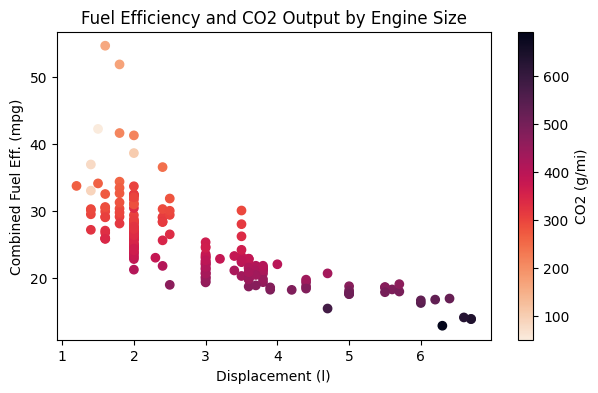

In [26]:
# loading in the data, sampling to reduce points plotted
fuel_econ = pd.read_csv('../data/fuel_econ.csv')

np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace = False)
fuel_econ_subset = fuel_econ.loc[sample]

# plotting the data
plt.figure(figsize = [7,4])
plt.scatter(data = fuel_econ_subset, x = 'displ', y = 'comb', c = 'co2', cmap = 'rocket_r')
plt.title('Fuel Efficiency and CO2 Output by Engine Size')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

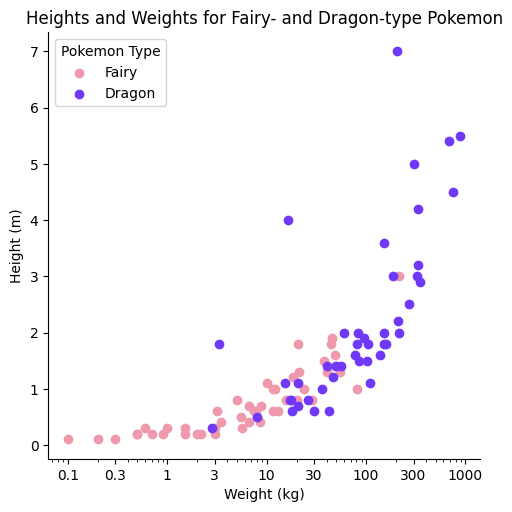

In [27]:
def polishing_solution_1():
    # data setup
    pokemon = pd.read_csv('../data/pokemon.csv')
    type_cols = ['type_1','type_2']
    non_type_cols = pokemon.columns.difference(type_cols)
    pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, var_name = 'type_level', value_name = 'type').dropna()
    pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy','dragon'])]
    # set up a dictionary to map types to colors
    type_colors = {'fairy': '#ee99ac', 'dragon': '#7038f8'}
    # plotting
    g = sns.FacetGrid(data = pokemon_sub, hue = 'type', height = 5, palette = type_colors)
    g.map(plt.scatter, 'weight','height')
    g.set(xscale = 'log') # need to set scaling before customizing ticks
    x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    g.set(xticks = x_ticks, xticklabels = x_ticks)
    # add labels and titles
    g.set_xlabels('Weight (kg)')
    g.set_ylabels('Height (m)')
    plt.title('Heights and Weights for Fairy- and Dragon-type Pokemon')
    plt.legend(['Fairy', 'Dragon'], title = 'Pokemon Type')
polishing_solution_1()